# Wavelet transforms:

### Example 1:

Let's carry out a DWT of this signal:

$f(n) = (2, 4, 6, 8, 9, -2, 3, -4)$ 

Then, carry out an inverse DWT to recover the signal.

In [1]:
import pywt
import matplotlib.pyplot as plt

# https://pywavelets.readthedocs.io/en/latest/

In [2]:
print("These are the possible wavelets: ", pywt.wavelist())

These are the possible wavelets:  ['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5'

In [3]:
# List 2 wavelets

w1 = pywt.Wavelet('db24')

w2 = pywt.Wavelet('haar')


print("Print information on the wavelet: \n", w1)

Print information on the wavelet: 
 Wavelet db24
  Family name:    Daubechies
  Short name:     db
  Filters length: 48
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [4]:
# Gather information on wavelt:

phi_1, psi_1, x_1 = w1.wavefun(level=5)


phi_2, psi_2, x_2 = w2.wavefun(level=5)

In [5]:
print(phi_1.shape, phi_2.shape)

(1505,) (34,)


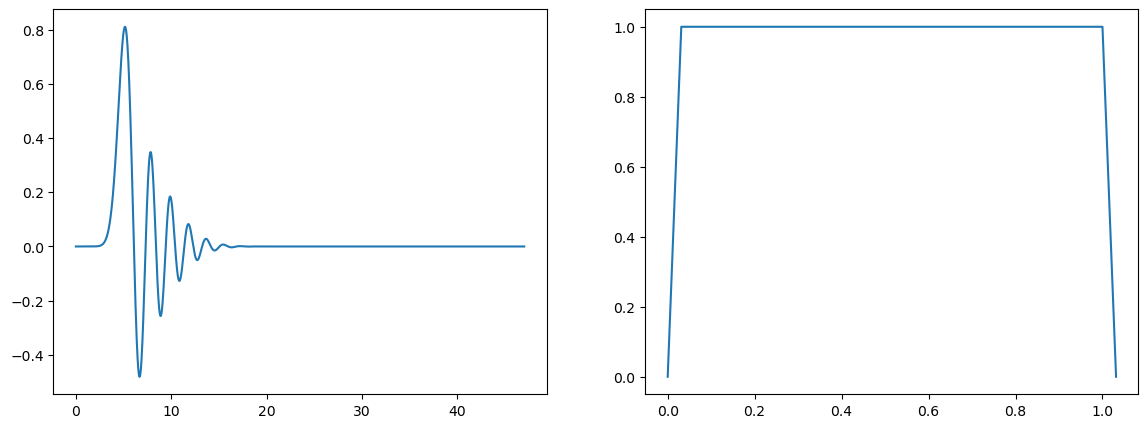

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,5))

ax1.plot(x_1, phi_1)

ax2.plot(x_2, phi_2)

plt.show()

In [7]:
# signal:

f = [2, 4, 6, 8, 9, -2, 3, -4]

print(f, len(f))

[2, 4, 6, 8, 9, -2, 3, -4] 8


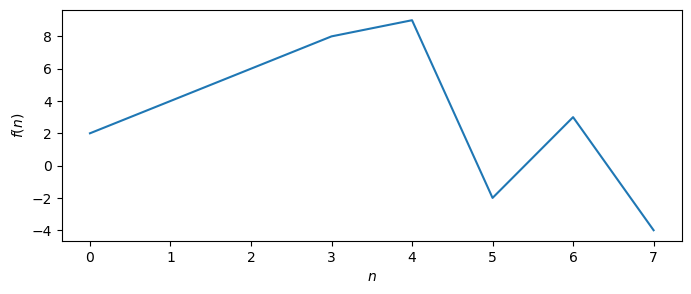

In [8]:
plt.figure(figsize=(8,3))

plt.plot(f)

plt.xlabel(r"$n$")

plt.ylabel(r"$f(n)$")

plt.show()

In [9]:
# DWT:

cA, cD = pywt.dwt(f, 'haar')

In [10]:
print(cA) # approximation coef.
print(cA.shape)

[ 4.24264069  9.89949494  4.94974747 -0.70710678]
(4,)


In [11]:
print(cD) # detail coef.
print(cD.shape)

[-1.41421356 -1.41421356  7.77817459  4.94974747]
(4,)


## Full signal reconstruction:

In [12]:
# iDWT

f_recovered = pywt.idwt(cA, cD, 'haar')

In [13]:
print(f)
print(f_recovered)

[2, 4, 6, 8, 9, -2, 3, -4]
[ 2.  4.  6.  8.  9. -2.  3. -4.]


### Signal reconstruction with approximation/detail coefficients only:

In [14]:
# iDWT
# Only CA
f_ca = pywt.idwt(cA, None, 'haar')

# Only CD
f_cd = pywt.idwt(None, cD, 'haar')

In [15]:
print(f_ca)
print(f_ca.shape)

print(f_cd)
print(f_cd.shape)

[ 3.   3.   7.   7.   3.5  3.5 -0.5 -0.5]
(8,)
[-1.   1.  -1.   1.   5.5 -5.5  3.5 -3.5]
(8,)


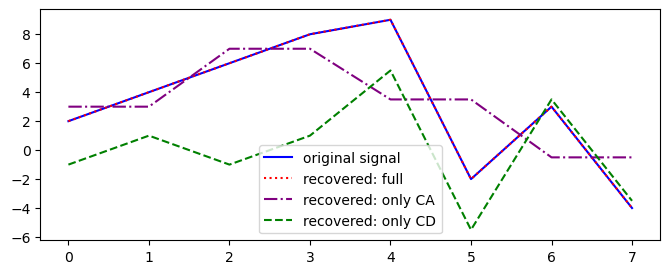

In [16]:
plt.figure(figsize=(8,3))

plt.plot(f, color = "blue", label= "original signal")

plt.plot(f_recovered, color = "red", linestyle = ":", label= "recovered: full")

plt.plot(f_ca, color = "purple", linestyle = "-.", label= "recovered: only CA")

plt.plot(f_cd, color = "green", linestyle = "--", label= "recovered: only CD")

plt.legend()
plt.show()

### Example 2:

$$f(x)= A\sin(k\,x) + b\,n(x)$$

In [17]:
import numpy as np

In [18]:
# Pure sine function

def func(x_axis, a, k, b):
    """
    Inputs:
    a -> amplitude of the sine function
    k -> wavenumber
    b -> noise amplitude
    """
    f_sin = a*np.sin(k*x) + b*np.random.randn(len(x))
    
    return f_sin

In [19]:
# Generate x axis
x = np.linspace(0., 4*np.pi, 1000)

# Fix properties
a = 1.
k = 3./(np.pi)
b = 0.05

# Evaluate our function
noisy_sine = func(x, a, k, b)

print(x.shape, noisy_sine.shape)

(1000,) (1000,)


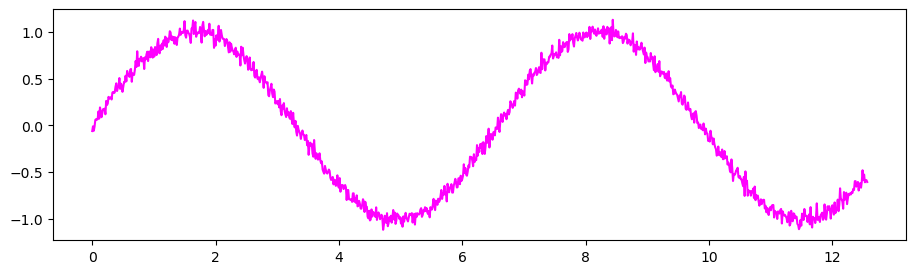

In [20]:
plt.figure(figsize=(11, 3))

plt.plot(x, noisy_sine, color = "magenta")

plt.show()

### Wavelet transforms:

In [21]:
# DWT:

cA, cD = pywt.dwt(noisy_sine, 'haar')

print(noisy_sine.shape, cA.shape, cD.shape)

(1000,) (500,) (500,)


### Reconstruct the full signal:

In [22]:
# iDWT

f_recovered = pywt.idwt(cA, cD, 'haar')

print(f_recovered.shape)

(1000,)


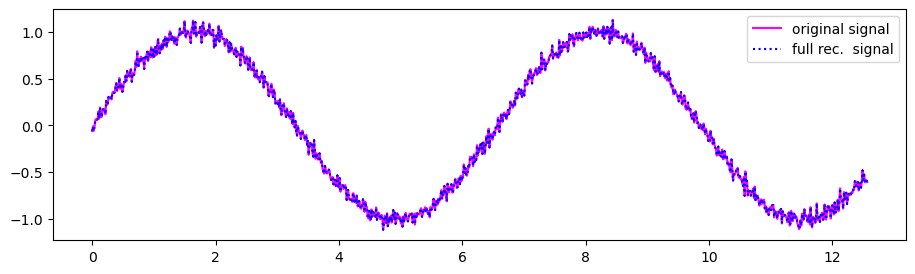

In [23]:
plt.figure(figsize=(11, 3))

plt.plot(x, noisy_sine, color = "magenta", label = "original signal")

plt.plot(x, f_recovered, linestyle = ":", color = "blue", label = "full rec.  signal")


plt.legend()

plt.show()

### Only low frequencies: Only with cA coefficients

In [24]:
# iDWT

f_ca = pywt.idwt(cA, None, 'haar')

print(x.shape, f_ca.shape)

(1000,) (1000,)


### Only high frequencies: Only with cD coefficients

In [25]:
# iDWT

f_cd = pywt.idwt(None, cD, 'haar')

print(f_cd.shape)

(1000,)


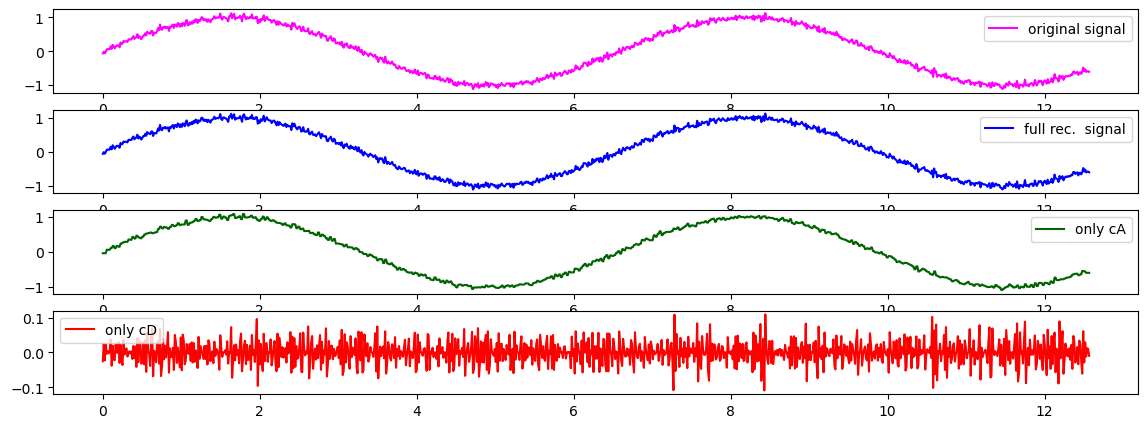

In [26]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (14,5))

ax1.plot(x, noisy_sine, color = "magenta", label = "original signal")
ax1.legend()

ax2.plot(x, f_recovered, linestyle = "-", color = "blue", label = "full rec.  signal")
ax2.legend()

ax3.plot(x, f_ca, linestyle = "-", color = "darkgreen", label = "only cA")
ax3.legend()

ax4.plot(x, f_cd, linestyle = "-", color = "red", label = "only cD")
ax4.legend()
plt.show()

### Second level of decomposition

In [27]:
# DWT:

cA2, cD2 = pywt.dwt(f_ca, 'haar')

print(noisy_sine.shape, f_ca.shape)

(1000,) (1000,)


In [28]:
# iDWT

f_ca2 = pywt.idwt(cA2, None, 'haar')

f_cd2 = pywt.idwt(None, cD2, 'haar')

print(x.shape, f_ca2.shape, f_cd2.shape)

(1000,) (1000,) (1000,)


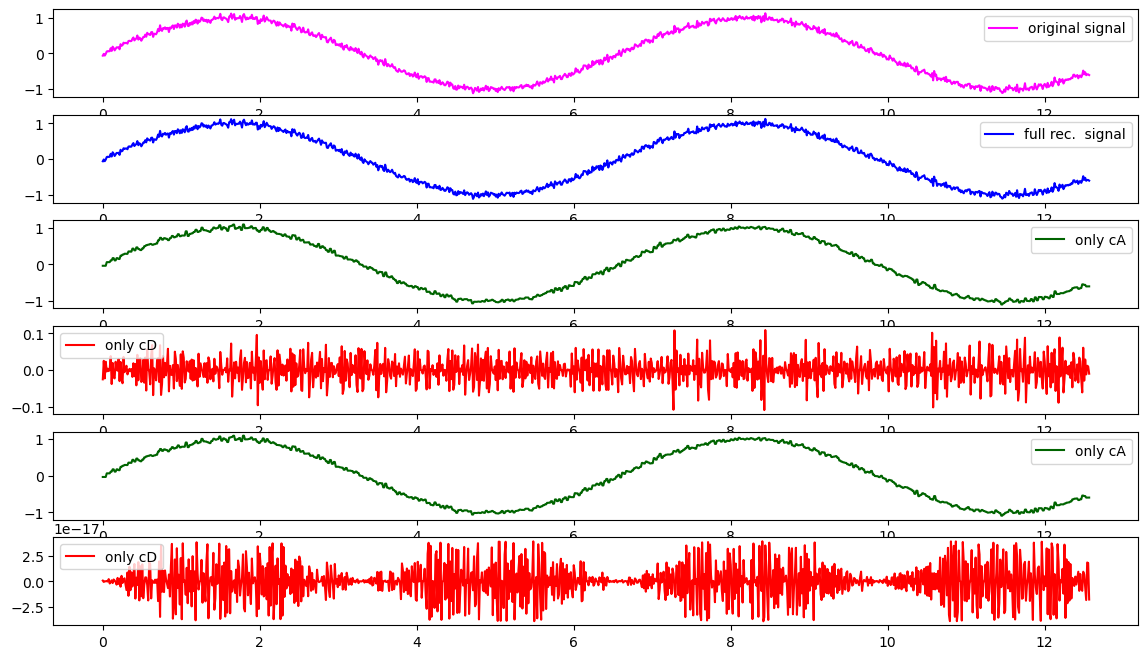

In [29]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize = (14,8))

ax1.plot(x, noisy_sine, color = "magenta", label = "original signal")
ax1.legend()

ax2.plot(x, f_recovered, linestyle = "-", color = "blue", label = "full rec.  signal")
ax2.legend()

ax3.plot(x, f_ca, linestyle = "-", color = "darkgreen", label = "only cA")
ax3.legend()

ax4.plot(x, f_cd, linestyle = "-", color = "red", label = "only cD")
ax4.legend()

ax5.plot(x, f_ca2, linestyle = "-", color = "darkgreen", label = "only cA")
ax5.legend()

ax6.plot(x, f_cd2, linestyle = "-", color = "red", label = "only cD")
ax6.legend()

plt.show()

### Wavelet transform analysis:

coeffs = pywt.wavedec(x, 'wavelet', mode ='sym', level = n)

y = pywt.waverec(coeffs, 'wavelet', mode ='sym')

### Revisit the first example

In [30]:
print(f)

[2, 4, 6, 8, 9, -2, 3, -4]


### DWT decomposition:

In [31]:
coeffs = pywt.wavedec(f, 'db1', level = 2, mode = 'periodic')

cA2, cD2, cD1 = coeffs

print(cA2)
print(cD2)
print(cD1)

[10.  3.]
[-4.  4.]
[-1.41421356 -1.41421356  7.77817459  4.94974747]


### DWT reconstruction:

In [32]:
f_recovered2 = pywt.waverec(coeffs, 'db1', mode = 'periodic')

In [33]:
print(f)
print(f_recovered2)

[2, 4, 6, 8, 9, -2, 3, -4]
[ 2.  4.  6.  8.  9. -2.  3. -4.]


### Signal reconstruction ignoring the last level

In [34]:
coeffs[-1] = np.zeros_like(coeffs[-1])

f_c1 = pywt.waverec(coeffs, 'db1', mode = 'periodic')

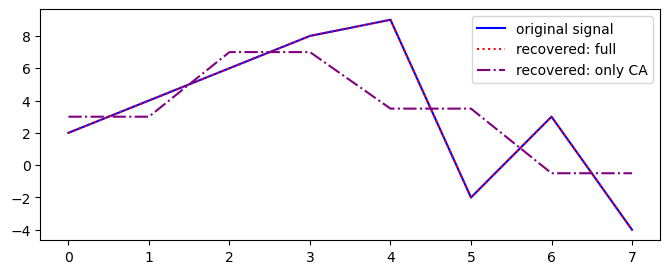

In [35]:
plt.figure(figsize=(8,3))

plt.plot(f, color = "blue", label= "original signal")

plt.plot(f_recovered2, color = "red", linestyle = ":", label= "recovered: full")

plt.plot(f_c1, color = "purple", linestyle = "-.", label= "recovered: only CA")

#plt.plot(f_cd, color = "green", linestyle = "--", label= "recovered: only CD")

plt.legend()
plt.show()

### Revisit the second example

#### DWT:

In [36]:
coeffs = pywt.wavedec(noisy_sine, 'db1', level = 2, mode = 'periodic')

cA2, cD2, cD1 = coeffs

print(cA2.shape)
print(cD2.shape)
print(cD1.shape)

(250,)
(250,)
(500,)


### Reconstruct signal in full:

In [37]:
noisy_sine_rec = pywt.waverec(coeffs, 'db1', mode = 'periodic')

In [38]:
coeffs[-2] = np.zeros_like(coeffs[-2])

coeffs[-1] = np.zeros_like(coeffs[-1])

noisy_sine_c2 = pywt.waverec(coeffs, 'db1', mode = 'periodic')

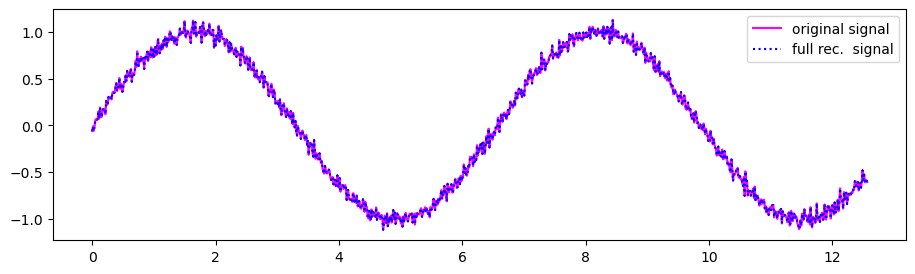

In [39]:
plt.figure(figsize=(11, 3))

plt.plot(x, noisy_sine, color = "magenta", label = "original signal")

plt.plot(x, noisy_sine_rec, linestyle = ":", color = "blue", label = "full rec.  signal")


plt.legend()

plt.show()

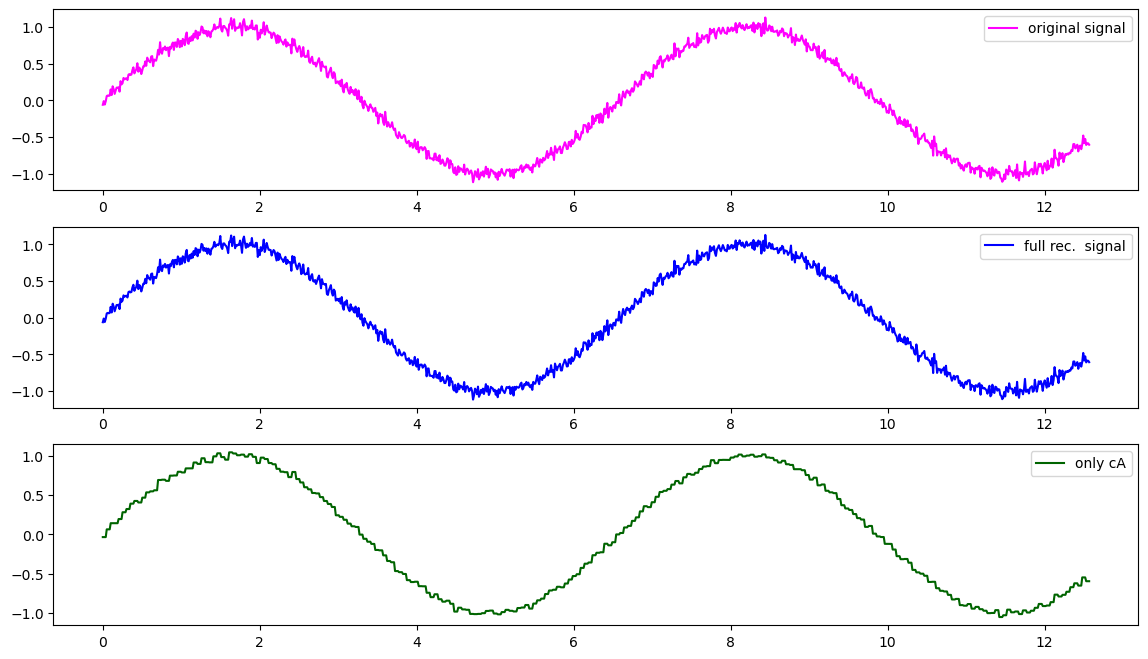

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (14,8))

ax1.plot(x, noisy_sine, color = "magenta", label = "original signal")
ax1.legend()

ax2.plot(x, noisy_sine_rec, linestyle = "-", color = "blue", label = "full rec.  signal")
ax2.legend()

ax3.plot(x, noisy_sine_c2, linestyle = "-", color = "darkgreen", label = "only cA")
ax3.legend()

plt.show()